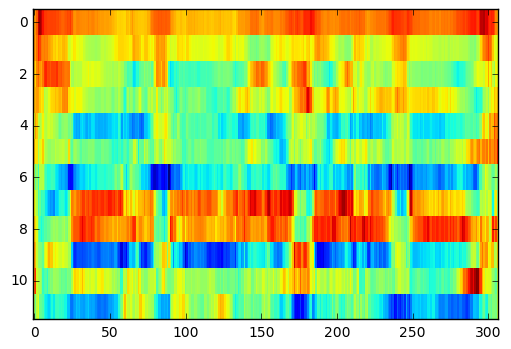

In [14]:
#### this reproduces the way htk extracts MFCC with the default configuration:
# SOURCEFORMAT = WAV
# TARGETKIND = MFCC_0
# TARGETRATE = 100000.0
# SAVECOMPRESSED = T
# SAVEWITHCRC = T
# WINDOWSIZE = 250000.0
# USEHAMMING = T
# PREEMCOEF = 0
# NUMCHANS = 26
# CEPLIFTER = 22
# NUMCEPS = 12
# ENORMALISE = F
# HIFREQ=8000
import essentia
import essentia.standard as ess
import matplotlib.pyplot as plt

fs = 44100
audio = ess.MonoLoader(filename = 'audio/vignesh.wav', 
                                      sampleRate = fs)()
# dynamic range expansion as done in HTK implementation
audio = audio*2**15

frameSize = 1102 # corresponds to htk default WINDOWSIZE = 250000.0 
hopSize = 441 # corresponds to htk default TARGETRATE = 100000.0
fftSize = 2048
spectrumSize= fftSize//2+1
zeroPadding = fftSize - frameSize

w = ess.Windowing(type = 'hamming', #  corresponds to htk default  USEHAMMING = T
                    size = frameSize, 
                    zeroPadding = zeroPadding,
                    normalized = False,
                    zeroPhase = False)

spectrum = ess.Spectrum(size = fftSize)

mfcc_htk = ess.MFCC(inputSize = spectrumSize,
                    type = 'magnitude', # htk uses mel filterbank magniude
                    warpingFormula = 'htkMel', # htk's mel warping formula
                    weighting = 'linear', # computation of filter weights done in Hz domain
                    highFrequencyBound = 8000, # corresponds to htk default
                    lowFrequencyBound = 0, # corresponds to htk default
                    numberBands = 26, # corresponds to htk default  NUMCHANS = 26
                    numberCoefficients = 13,
                    normalize = 'unit_max', # htk filter normaliation to have constant height = 1  
                    dctType = 3, # htk uses DCT type III
                    logType = 'log',
                    liftering = 22) # corresponds to htk default CEPLIFTER = 22


mfccs = []
# startFromZero = True, validFrameThresholdRatio = 1 : the way htk computes windows
for frame in ess.FrameGenerator(audio, frameSize = frameSize, hopSize = hopSize , startFromZero = True, validFrameThresholdRatio = 1):
    spect = spectrum(w(frame))
    mel_bands, mfcc_coeffs = mfcc_htk(spect)
    mfccs.append(mfcc_coeffs)


# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
# mfccs = essentia.array(pool['MFCC']).T
mfccs = essentia.array(mfccs).T

# and plot
plt.imshow(mfccs[1:,:], aspect = 'auto', interpolation='none') # ignore enery
# plt.imshow(mfccs, aspect = 'auto', interpolation='none')
plt.show() # unnecessary if you started "ipython --pylab"

In [3]:
spectrum?